## Agent MDP interaction

The MDPLoop class is in charge of running the agent/MDP interaction and can be used to display the resulting results (regret and return) for the acting agent and for a randomly acting one that serves as a baseline.

### $\texttt{PSRL}$ agent on a $\texttt{FrozenLake}$ MDP instance.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

from colosseum import config
from colosseum.agent.mdp_models.bayesian_models import RewardsConjugateModel, TransitionsConjugateModel
from colosseum.agent.agents.episodic import PSRLEpisodic
from colosseum.mdp.frozen_lake import FrozenLakeEpisodic
from colosseum.utils import make_environment_spec
from colosseum.utils.acme.in_memory_logger import InMemoryLogger
from colosseum.experiment.agent_mdp_interaction import MDPLoop

sns.set_theme()

/home/michelangelo/miniconda3/envs/test37/lib/python3.7/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/michelangelo/miniconda3/envs/test37/lib/python3.7/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [2]:
optimization_horizon = 20_000

In [3]:
mdp = FrozenLakeEpisodic(seed=42, size=4, p_frozen=0.8)
agent = PSRLEpisodic(
    environment_spec=make_environment_spec(mdp),
    seed=42,
    optimization_horizon=optimization_horizon,
    reward_prior_model=RewardsConjugateModel.N_NIG,
    transitions_prior_model=TransitionsConjugateModel.M_DIR,
    rewards_prior_prms=[0.33, 1, 1, 1],
    transitions_prior_prms=[0.017],
)

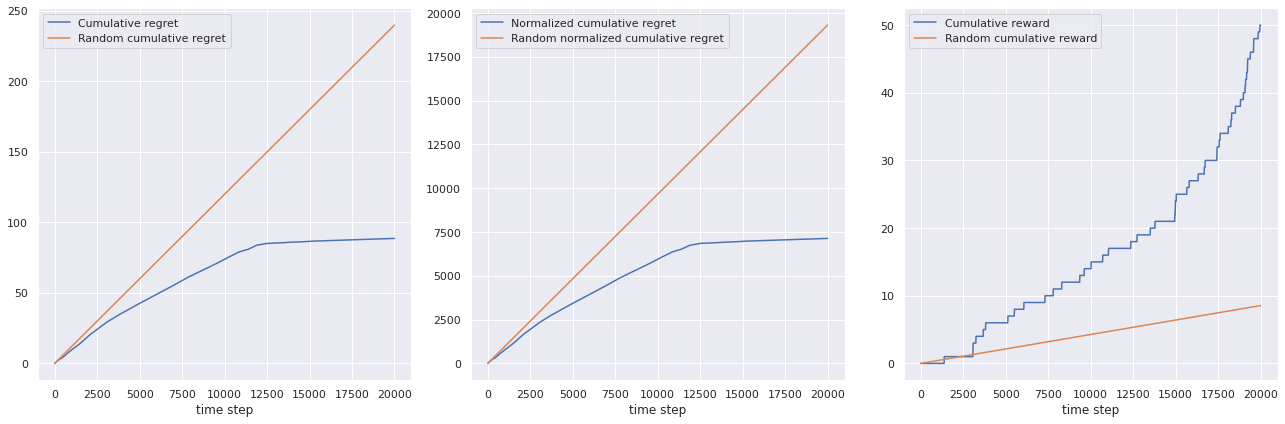

In [4]:
loop = MDPLoop(
    mdp, agent, logger=InMemoryLogger()
)  # or CSVLogger() to save the logs in csv files.
loop.run(T=optimization_horizon, log_every=10)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(3 * 6, 6))
loop.plot(["cumulative_regret", "random_cumulative_regret"], ax1)
loop.plot(["normalized_cumulative_regret", "random_normalized_cumulative_regret"], ax2)
loop.plot(["cumulative_reward", "random_cumulative_reward"], ax3)
plt.tight_layout()
plt.show()